## Goal:
   - To built a NN to classify Reuters newswire into 46 topics (categories)
   - This is a multiclass classification problem for text
   - Reuters data set published in 1986


In [24]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

import numpy as np

In [3]:
# Each example is a list of integers (word indices)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [11]:
# Decoding the example integers to words

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

In [19]:
# Vectorizing data function

def vectorize_sequence(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [20]:
# One-Hot encoding function

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):
        results[i, label] = 1.

    return results


In [26]:
#Vectorizing data 

x_train = vectorize_sequence(train_data)
x_test  = vectorize_sequence(test_data)


In [23]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:

# one hot train labels using function
one_hot_train_labels = to_one_hot(train_labels)


# Using Keras one-hot built-in function 

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels  = to_categorical(test_labels)


# separte 1000 samples from the training data set for validation
# and use the rest for training 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [50]:
# Building the NN 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
# training the network 

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=520, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 227us/sample - loss: 2.6604 - accuracy: 0.5226 - val_loss: 1.7386 - val_accuracy: 0.6370
Epoch 2/20
7982/7982 [==============================] - 1s 147us/sample - loss: 1.4177 - accuracy: 0.7032 - val_loss: 1.3043 - val_accuracy: 0.7220
Epoch 3/20
7982/7982 [==============================] - 1s 150us/sample - loss: 1.0437 - accuracy: 0.7709 - val_loss: 1.1604 - val_accuracy: 0.7510
Epoch 4/20
7982/7982 [==============================] - 1s 158us/sample - loss: 0.8285 - accuracy: 0.8190 - val_loss: 1.0496 - val_accuracy: 0.7630
Epoch 5/20
7982/7982 [==============================] - 1s 150us/sample - loss: 0.6631 - accuracy: 0.8611 - val_loss: 1.0681 - val_accuracy: 0.7610
Epoch 6/20
7982/7982 [==============================] - 1s 151us/sample - loss: 0.5298 - accuracy: 0.8879 - val_loss: 0.9379 - val_accuracy: 0.7980
Epoch 7/20
7982/7982 [==============================] - 1s 151us

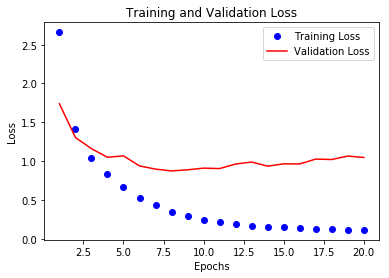

In [52]:
# Ploting Loss and Accuracy 

import matplotlib.pyplot as plt 



loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

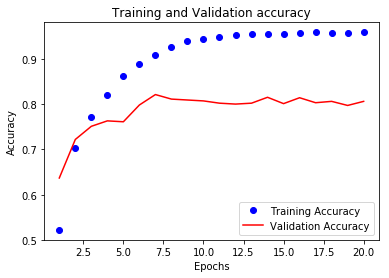

In [53]:
# Plotting the Training Accuracy and Validation Accuracy

training_accuracy = history.history['accuracy']
val_accuracy      = history.history['val_accuracy']

plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [54]:
# Evaluate the model

results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 153us/sample - loss: 1.2431 - accuracy: 0.7854


[1.2430950279015043, 0.7853963]